# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     60.11
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           6.62e-22
Time:                        01:20:16   Log-Likelihood:                -375.58
No. Observations:                 244   AIC:                             757.2
Df Residuals:                     241   BIC:                             767.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.3015      0.191      6.

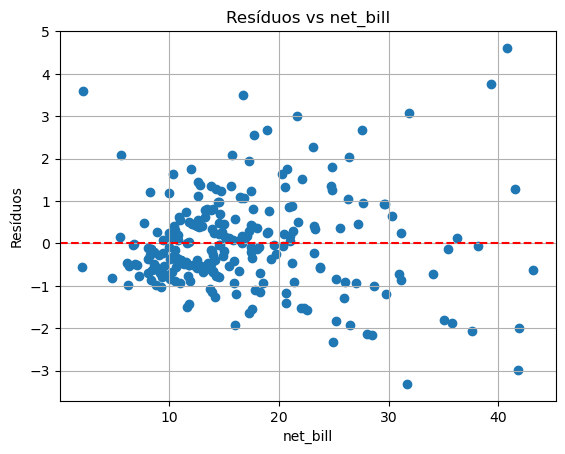

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.47
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           4.90e-19
Time:                        01:20:16   Log-Likelihood:                -382.27
No. Observations:                 244   AIC:                             770.5
Df Residuals:                     241   BIC:                             781.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.2818      0.433     -2.

In [6]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import patsy
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm

tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

modelo = smf.ols('tip ~ net_bill', data=tips).fit()

modelo_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()

formula_sig = 'tip ~ time + net_bill'

y, X = patsy.dmatrices(formula_sig, data=tips, return_type='dataframe')

modelo_sig = sm.OLS(y, X).fit()

# Exibe o resumo
print(modelo_sig.summary())

residuos = modelo_sig.resid
plt.scatter(tips['net_bill'], residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.title('Resíduos vs net_bill')
plt.grid(True)
plt.show()

tips['log_net_bill'] = np.log(tips['net_bill'])

formula_log = 'tip ~ time + log_net_bill'
y, X = patsy.dmatrices(formula_log, data=tips, return_type='dataframe')
modelo_log = sm.OLS(y, X).fit()
print(modelo_log.summary())

tips['net_bill_sq'] = tips['net_bill'] ** 2

formula_poly = 'tip ~ time + net_bill + net_bill_sq'
y, X = patsy.dmatrices(formula_poly, data=tips, return_type='dataframe')
modelo_poly = sm.OLS(y, X).fit()
print(modelo_poly.summary())

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     18.45
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           3.16e-13
Time:                        01:23:13   Log-Likelihood:                -105.91
No. Observations:                 244   AIC:                             221.8
Df Residuals:                     239   BIC:                             239.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.2888      0.080    -16.

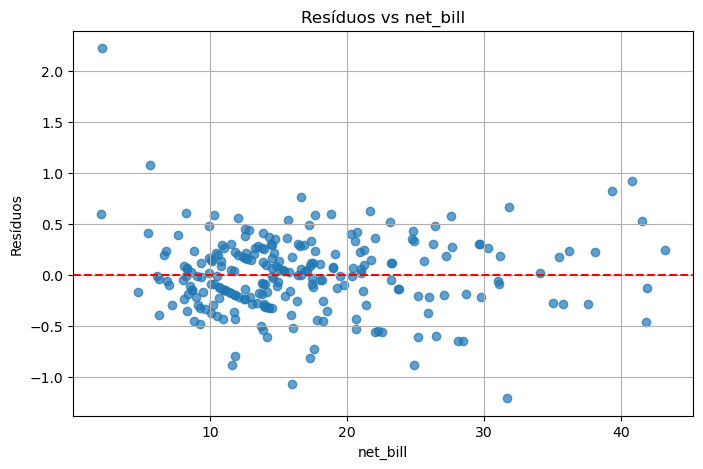


Modelo com log(net_bill):
                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     50.13
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           6.27e-19
Time:                        01:23:13   Log-Likelihood:                -96.304
No. Observations:                 244   AIC:                             198.6
Df Residuals:                     241   BIC:                             209.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.40

In [8]:
y, X = patsy.dmatrices('np.log(tip_pct) ~ sex + smoker + time + net_bill', data=tips, return_type='dataframe')

modelo_inicial = sm.OLS(y, X).fit()
print(modelo_inicial.summary())

y, X = patsy.dmatrices('np.log(tip_pct) ~ smoker + net_bill', data=tips, return_type='dataframe')
modelo_sig = sm.OLS(y, X).fit()
print("\nModelo com variáveis significantes:")
print(modelo_sig.summary())

plt.figure(figsize=(8,5))
plt.scatter(tips['net_bill'], modelo_sig.resid, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.title('Resíduos vs net_bill')
plt.grid(True)
plt.show()

tips['log_net_bill'] = np.log(tips['net_bill'])
y_log, X_log = patsy.dmatrices('np.log(tip_pct) ~ smoker + log_net_bill', data=tips, return_type='dataframe')
modelo_log = sm.OLS(y_log, X_log).fit()
print("\nModelo com log(net_bill):")
print(modelo_log.summary())

tips['net_bill_sq'] = tips['net_bill'] ** 2
y_poly, X_poly = patsy.dmatrices('np.log(tip_pct) ~ smoker + net_bill + net_bill_sq', data=tips, return_type='dataframe')
modelo_poly = sm.OLS(y_poly, X_poly).fit()
print("\nModelo com net_bill + net_bill^2:")
print(modelo_poly.summary())

tips['tip_pct_pred'] = np.exp(modelo_log.fittedvalues)
r2_original = 1 - np.sum((tips['tip_pct'] - tips['tip_pct_pred'])**2) / np.sum((tips['tip_pct'] - tips['tip_pct'].mean())**2)

print(f"\nR² do modelo log(tip_pct) ~ log(net_bill) na escala original do tip_pct: {r2_original:.4f}")

r2_item_I = 0.295

print(f"R² do modelo do item I (tip ~ log(net_bill)): {r2_item_I:.4f}")
print("=> O modelo com log(tip_pct) ~ log(net_bill) tem melhor ajuste." if r2_original > r2_item_I else "=> O modelo do item I tem melhor ajuste.")

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.